# German IT companies salary analysis 



#### The basic idea is analyzing the salary of IT companies in Germany on the basis of various position , technolgies used , working experience & the seniority level in the company so that if someone is planning to work in germany in an IT company then they can understand what technologies they have to learn to get a job or if they are already doing a job how much salary the can expect and many more things.

In [2]:
#Importing necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [3]:
#Reading csv file

df = pd.read_csv('C:/Users/abhishek/Desktop/Data Analyst Project/EDA practice/IT Salary Survey EU  2020.csv')

In [4]:
df.head()

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology,Other technologies you use often,...,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",...,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,...,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",...,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,...,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",...,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN


In [5]:
#deriving column

df.columns

Index(['Timestamp', 'Age', 'Gender', 'City', 'Position ',
       'Total years of experience', 'Years of experience in Germany',
       'Seniority level', 'Your main technology',
       'Other technologies you use often',
       'Yearly brutto salary (without bonus and stocks) in EUR',
       'Yearly bonus + stocks in EUR',
       'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country',
       'Annual bonus+stocks one year ago. Only answer if staying in same country',
       'Number of vacation days', 'Employment status', 'Сontract duration',
       'Main language at work', 'Company size', 'Company type',
       'Have you lost your job due to the coronavirus outbreak?',
       'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week',
       'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR'],
      dtype='object')

In [6]:
#knowing data types of columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 23 columns):
 #   Column                                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                                   --------------  -----  
 0   Timestamp                                                                                                                1253 non-null   object 
 1   Age                                                                                                                      1226 non-null   float64
 2   Gender                                                                                                                   1243 non-null   object 
 3   City                                                                                                                     1253 non-null   o

# Data Cleaning

In [7]:
#renaming column

df.rename(columns={'Timestamp':'Date', 'Total years of experience':'experience','Years of experience in Germany':'experience_in_Germany','Your main technology':'main_technology','Other technologies you use often':'Other_technologies','Yearly brutto salary (without bonus and stocks) in EUR':'yearly_salary','Yearly bonus + stocks in EUR':'yearly_bonus','Number of vacation days':'vacation'}, inplace=True)

In [8]:
#Converting date column from object type to date type

df['Date'] = pd.to_datetime(df['Date'])

In [9]:
df['vacation']

0               30
1               28
2               30
3               24
4               29
           ...    
1248            26
1249    unlimited 
1250            28
1251            27
1252            30
Name: vacation, Length: 1253, dtype: object

In [10]:
df['Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1253 entries, 0 to 1252
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
1253 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 9.9 KB


In [11]:
#Removing time stamp from date column

df['Date'] = df['Date'].dt.date

In [12]:
df.head()

,Date,Age,Gender,City,Position,experience,experience_in_Germany,Seniority level,main_technology,Other_technologies,...,Annual bonus+stocks one year ago. Only answer if staying in same country,vacation,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,2020-11-24,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",...,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,2020-11-24,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,...,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,2020-11-24,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",...,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN
3,2020-11-24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,...,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN
4,2020-11-24,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",...,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 23 columns):
 #   Column                                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                                   --------------  -----  
 0   Date                                                                                                                     1253 non-null   object 
 1   Age                                                                                                                      1226 non-null   float64
 2   Gender                                                                                                                   1243 non-null   object 
 3   City                                                                                                                     1253 non-null   o

In [14]:
#converting object_type to numeric_type

df['experience'] = pd.to_numeric(df['experience'],errors = 'coerce')

In [15]:
df['experience_in_Germany'] = pd.to_numeric(df['experience_in_Germany'],errors = 'coerce')
df['yearly_salary'] = pd.to_numeric(df['yearly_salary'],errors = 'coerce')
df['yearly_bonus'] = pd.to_numeric(df['yearly_bonus'],errors = 'coerce')
df['vacation'] = pd.to_numeric(df['vacation'],errors = 'coerce')

In [16]:
df['Company size']

0         51-100
1       101-1000
2       101-1000
3         51-100
4       101-1000
          ...   
1248      51-100
1249       1000+
1250    101-1000
1251    101-1000
1252      51-100
Name: Company size, Length: 1253, dtype: object

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 23 columns):
 #   Column                                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                                   --------------  -----  
 0   Date                                                                                                                     1253 non-null   object 
 1   Age                                                                                                                      1226 non-null   float64
 2   Gender                                                                                                                   1243 non-null   object 
 3   City                                                                                                                     1253 non-null   o

In [18]:
mean = 'age',''
median = 'experience','experience_in_Germany'
mode = 'gender','position','Seniority level','Employment status','Сontract duration','Main language at work','Company type'

C:\Users\Abhishek\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='vacation'>

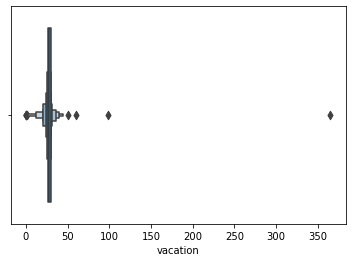

In [19]:
sns.boxenplot(df['vacation'], data = df)

In [20]:
df['vacation'].median()

28.0

In [21]:
#knowing the null values in the columns

df.isnull().sum()

Date                                                                                                                         0
Age                                                                                                                         27
Gender                                                                                                                      10
City                                                                                                                         0
Position                                                                                                                     6
experience                                                                                                                  23
experience_in_Germany                                                                                                       59
Seniority level                                                                                                

In [22]:
df.rename(columns={'Position ':'Position'}, inplace=True)

In [23]:
df['Сontract duration']

0       Unlimited contract
1       Unlimited contract
2       Temporary contract
3       Unlimited contract
4       Unlimited contract
               ...        
1248    Unlimited contract
1249    Unlimited contract
1250    Unlimited contract
1251    Unlimited contract
1252    Unlimited contract
Name: Сontract duration, Length: 1253, dtype: object

In [24]:
age_null = df['Age'].isnull() == True
age_null

0       False
1       False
2       False
3       False
4       False
        ...  
1248    False
1249    False
1250    False
1251    False
1252    False
Name: Age, Length: 1253, dtype: bool

In [25]:
df['Position']

0                            Software Engineer
1                            Backend Developer
2                            Software Engineer
3                           Frontend Developer
4                            Backend Developer
                         ...                  
1248                         Backend Developer
1249    Researcher/ Consumer Insights Analyst 
1250                     IT Operations Manager
1251                        Frontend Developer
1252                                    DevOps
Name: Position, Length: 1253, dtype: object

In [26]:
#Storing categorical values to fill null values using mode

to_impute_by_mode = df.loc[:,['Gender','Position','Seniority level','Employment status',
                              'Сontract duration','Main language at work','Company type']]

In [27]:
to_impute_by_mode

,Gender,Position,Seniority level,Employment status,Сontract duration,Main language at work,Company type
0,Male,Software Engineer,Senior,Full-time employee,Unlimited contract,English,Product
1,Male,Backend Developer,Senior,Full-time employee,Unlimited contract,English,Product
2,Male,Software Engineer,Lead,Self-employed (freelancer),Temporary contract,English,Product
3,Male,Frontend Developer,Junior,Full-time employee,Unlimited contract,English,Startup
4,Male,Backend Developer,Senior,Full-time employee,Unlimited contract,English,Product
...,...,...,...,...,...,...,...
1248,Male,Backend Developer,Senior,Full-time employee,Unlimited contract,English,Product
1249,Male,Researcher/ Consumer Insights Analyst,Senior,Full-time employee,Unlimited contract,English,Product
1250,Male,IT Operations Manager,Lead,Full-time employee,Unlimited contract,English,eCommerce
1251,Male,Frontend Developer,Middle,Full-time employee,Unlimited contract,German,Product


In [28]:
df['Position'].fillna(df['Position'].mode(), inplace = True)

In [29]:
#filling categorical values using mode

for i in to_impute_by_mode.columns:
    df[i].fillna(df[i].mode()[0], inplace = True)

In [30]:
df['Age'].isnull().sum()

27

In [31]:
#Storing numerical values to fill null values using median

to_impute_by_media = df.loc[:,['experience','experience_in_Germany']]

In [32]:
#filling categorical values using median

for i in to_impute_by_media.columns:
    df[i].fillna(df[i].median(), inplace = True)

In [33]:
#Storing numerical values to fill null values using mean

to_impute_by_mean = df.loc[:,['Age']]

In [34]:
#filling categorical values using mean

for i in to_impute_by_mean.columns:
    df[i].fillna(df[i].mean(), inplace = True)

In [35]:
df['Other_technologies'].fillna('No_tech', inplace=True)
df['vacation'].fillna('No_vacation', inplace=True)


In [36]:
df['yearly_bonus'].fillna(0.0, inplace=True)

In [37]:
df.isnull().sum()

Date                                                                                                                         0
Age                                                                                                                          0
Gender                                                                                                                       0
City                                                                                                                         0
Position                                                                                                                     0
experience                                                                                                                   0
experience_in_Germany                                                                                                        0
Seniority level                                                                                                

In [38]:
df.columns

Index(['Date', 'Age', 'Gender', 'City', 'Position', 'experience',
       'experience_in_Germany', 'Seniority level', 'main_technology',
       'Other_technologies', 'yearly_salary', 'yearly_bonus',
       'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country',
       'Annual bonus+stocks one year ago. Only answer if staying in same country',
       'vacation', 'Employment status', 'Сontract duration',
       'Main language at work', 'Company size', 'Company type',
       'Have you lost your job due to the coronavirus outbreak?',
       'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week',
       'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR'],
      dtype='object')

In [39]:
#dropping the columns that is not required

df.drop('Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country',axis = 1, inplace = True)
df.drop('Annual bonus+stocks one year ago. Only answer if staying in same country',axis = 1,inplace = True)
df.drop('Have you lost your job due to the coronavirus outbreak?',axis = 1,inplace = True)
df.drop('Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week',axis = 1,inplace = True)
df.drop('Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR',axis = 1, inplace = True)

In [40]:
#dropping all the duplicates values from data set since it was only occupying 1.42% of the dataset 

df.drop_duplicates(inplace=True)

In [41]:
df[df.duplicated()]

,Date,Age,Gender,City,Position,experience,experience_in_Germany,Seniority level,main_technology,Other_technologies,yearly_salary,yearly_bonus,vacation,Employment status,Сontract duration,Main language at work,Company size,Company type


In [42]:
df.isnull().sum()

Date                       0
Age                        0
Gender                     0
City                       0
Position                   0
experience                 0
experience_in_Germany      0
Seniority level            0
main_technology          124
Other_technologies         0
yearly_salary              0
yearly_bonus               0
vacation                   0
Employment status          0
Сontract duration          0
Main language at work      0
Company size              18
Company type               0
dtype: int64

In [43]:
df['Company size']

0         51-100
1       101-1000
2       101-1000
3         51-100
4       101-1000
          ...   
1248      51-100
1249       1000+
1250    101-1000
1251    101-1000
1252      51-100
Name: Company size, Length: 1239, dtype: object

In [44]:
df

,Date,Age,Gender,City,Position,experience,experience_in_Germany,Seniority level,main_technology,Other_technologies,yearly_salary,yearly_bonus,vacation,Employment status,Сontract duration,Main language at work,Company size,Company type
0,2020-11-24,26.0,Male,Munich,Software Engineer,5.0,3.0,Senior,TypeScript,"Kotlin, Javascript / Typescript",80000.0,5000.0,30.0,Full-time employee,Unlimited contract,English,51-100,Product
1,2020-11-24,26.0,Male,Berlin,Backend Developer,7.0,4.0,Senior,Ruby,No_tech,80000.0,0.0,28.0,Full-time employee,Unlimited contract,English,101-1000,Product
2,2020-11-24,29.0,Male,Berlin,Software Engineer,12.0,6.0,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",120000.0,120000.0,30.0,Self-employed (freelancer),Temporary contract,English,101-1000,Product
3,2020-11-24,28.0,Male,Berlin,Frontend Developer,4.0,1.0,Junior,Javascript,No_tech,54000.0,0.0,24.0,Full-time employee,Unlimited contract,English,51-100,Startup
4,2020-11-24,37.0,Male,Berlin,Backend Developer,17.0,6.0,Senior,C# .NET,".NET, SQL, AWS, Docker",62000.0,0.0,29.0,Full-time employee,Unlimited contract,English,101-1000,Product
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,2021-01-18,31.0,Male,Berlin,Backend Developer,9.0,5.0,Senior,Java,"Python, Javascript / Typescript, Java / Scala,...",70000.0,72000.0,26.0,Full-time employee,Unlimited contract,English,51-100,Product
1249,2021-01-18,33.0,Male,Berlin,Researcher/ Consumer Insights Analyst,10.0,1.5,Senior,consumer analysis,No_tech,60000.0,3000.0,No_vacation,Full-time employee,Unlimited contract,English,1000+,Product
1250,2021-01-18,39.0,Male,Munich,IT Operations Manager,15.0,2.0,Lead,PHP,"Python, C/C++, Javascript / Typescript, Java /...",110000.0,0.0,28.0,Full-time employee,Unlimited contract,English,101-1000,eCommerce
1251,2021-01-19,26.0,Male,Saarbrücken,Frontend Developer,7.0,7.0,Middle,JavaScript,"Javascript / Typescript, Docker, HTML, CSS; Ad...",38350.0,40950.0,27.0,Full-time employee,Unlimited contract,German,101-1000,Product


In [45]:
df.to_csv('German_Salary1.csv')

In [46]:
df['Age'] = round(df['Age'])

In [47]:
#cleaned dataset

df

,Date,Age,Gender,City,Position,experience,experience_in_Germany,Seniority level,main_technology,Other_technologies,yearly_salary,yearly_bonus,vacation,Employment status,Сontract duration,Main language at work,Company size,Company type
0,2020-11-24,26.0,Male,Munich,Software Engineer,5.0,3.0,Senior,TypeScript,"Kotlin, Javascript / Typescript",80000.0,5000.0,30.0,Full-time employee,Unlimited contract,English,51-100,Product
1,2020-11-24,26.0,Male,Berlin,Backend Developer,7.0,4.0,Senior,Ruby,No_tech,80000.0,0.0,28.0,Full-time employee,Unlimited contract,English,101-1000,Product
2,2020-11-24,29.0,Male,Berlin,Software Engineer,12.0,6.0,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",120000.0,120000.0,30.0,Self-employed (freelancer),Temporary contract,English,101-1000,Product
3,2020-11-24,28.0,Male,Berlin,Frontend Developer,4.0,1.0,Junior,Javascript,No_tech,54000.0,0.0,24.0,Full-time employee,Unlimited contract,English,51-100,Startup
4,2020-11-24,37.0,Male,Berlin,Backend Developer,17.0,6.0,Senior,C# .NET,".NET, SQL, AWS, Docker",62000.0,0.0,29.0,Full-time employee,Unlimited contract,English,101-1000,Product
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,2021-01-18,31.0,Male,Berlin,Backend Developer,9.0,5.0,Senior,Java,"Python, Javascript / Typescript, Java / Scala,...",70000.0,72000.0,26.0,Full-time employee,Unlimited contract,English,51-100,Product
1249,2021-01-18,33.0,Male,Berlin,Researcher/ Consumer Insights Analyst,10.0,1.5,Senior,consumer analysis,No_tech,60000.0,3000.0,No_vacation,Full-time employee,Unlimited contract,English,1000+,Product
1250,2021-01-18,39.0,Male,Munich,IT Operations Manager,15.0,2.0,Lead,PHP,"Python, C/C++, Javascript / Typescript, Java /...",110000.0,0.0,28.0,Full-time employee,Unlimited contract,English,101-1000,eCommerce
1251,2021-01-19,26.0,Male,Saarbrücken,Frontend Developer,7.0,7.0,Middle,JavaScript,"Javascript / Typescript, Docker, HTML, CSS; Ad...",38350.0,40950.0,27.0,Full-time employee,Unlimited contract,German,101-1000,Product


In [48]:
df.isnull().sum()

Date                       0
Age                        0
Gender                     0
City                       0
Position                   0
experience                 0
experience_in_Germany      0
Seniority level            0
main_technology          124
Other_technologies         0
yearly_salary              0
yearly_bonus               0
vacation                   0
Employment status          0
Сontract duration          0
Main language at work      0
Company size              18
Company type               0
dtype: int64

In [49]:
df.isnull().sum()

Date                       0
Age                        0
Gender                     0
City                       0
Position                   0
experience                 0
experience_in_Germany      0
Seniority level            0
main_technology          124
Other_technologies         0
yearly_salary              0
yearly_bonus               0
vacation                   0
Employment status          0
Сontract duration          0
Main language at work      0
Company size              18
Company type               0
dtype: int64

In [50]:
df.dropna(subset=['main_technology'],inplace=True)

In [51]:
df.dropna(subset=['Company size'],inplace=True)

In [52]:
df

,Date,Age,Gender,City,Position,experience,experience_in_Germany,Seniority level,main_technology,Other_technologies,yearly_salary,yearly_bonus,vacation,Employment status,Сontract duration,Main language at work,Company size,Company type
0,2020-11-24,26.0,Male,Munich,Software Engineer,5.0,3.0,Senior,TypeScript,"Kotlin, Javascript / Typescript",80000.0,5000.0,30.0,Full-time employee,Unlimited contract,English,51-100,Product
1,2020-11-24,26.0,Male,Berlin,Backend Developer,7.0,4.0,Senior,Ruby,No_tech,80000.0,0.0,28.0,Full-time employee,Unlimited contract,English,101-1000,Product
2,2020-11-24,29.0,Male,Berlin,Software Engineer,12.0,6.0,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",120000.0,120000.0,30.0,Self-employed (freelancer),Temporary contract,English,101-1000,Product
3,2020-11-24,28.0,Male,Berlin,Frontend Developer,4.0,1.0,Junior,Javascript,No_tech,54000.0,0.0,24.0,Full-time employee,Unlimited contract,English,51-100,Startup
4,2020-11-24,37.0,Male,Berlin,Backend Developer,17.0,6.0,Senior,C# .NET,".NET, SQL, AWS, Docker",62000.0,0.0,29.0,Full-time employee,Unlimited contract,English,101-1000,Product
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,2021-01-18,31.0,Male,Berlin,Backend Developer,9.0,5.0,Senior,Java,"Python, Javascript / Typescript, Java / Scala,...",70000.0,72000.0,26.0,Full-time employee,Unlimited contract,English,51-100,Product
1249,2021-01-18,33.0,Male,Berlin,Researcher/ Consumer Insights Analyst,10.0,1.5,Senior,consumer analysis,No_tech,60000.0,3000.0,No_vacation,Full-time employee,Unlimited contract,English,1000+,Product
1250,2021-01-18,39.0,Male,Munich,IT Operations Manager,15.0,2.0,Lead,PHP,"Python, C/C++, Javascript / Typescript, Java /...",110000.0,0.0,28.0,Full-time employee,Unlimited contract,English,101-1000,eCommerce
1251,2021-01-19,26.0,Male,Saarbrücken,Frontend Developer,7.0,7.0,Middle,JavaScript,"Javascript / Typescript, Docker, HTML, CSS; Ad...",38350.0,40950.0,27.0,Full-time employee,Unlimited contract,German,101-1000,Product


In [53]:
df.columns

Index(['Date', 'Age', 'Gender', 'City', 'Position', 'experience',
       'experience_in_Germany', 'Seniority level', 'main_technology',
       'Other_technologies', 'yearly_salary', 'yearly_bonus', 'vacation',
       'Employment status', 'Сontract duration', 'Main language at work',
       'Company size', 'Company type'],
      dtype='object')

In [54]:
df.to_pickle('sal')

In [55]:
df.drop(labels = ['Date'], axis = 1, inplace = True)

In [56]:
df

,Age,Gender,City,Position,experience,experience_in_Germany,Seniority level,main_technology,Other_technologies,yearly_salary,yearly_bonus,vacation,Employment status,Сontract duration,Main language at work,Company size,Company type
0,26.0,Male,Munich,Software Engineer,5.0,3.0,Senior,TypeScript,"Kotlin, Javascript / Typescript",80000.0,5000.0,30.0,Full-time employee,Unlimited contract,English,51-100,Product
1,26.0,Male,Berlin,Backend Developer,7.0,4.0,Senior,Ruby,No_tech,80000.0,0.0,28.0,Full-time employee,Unlimited contract,English,101-1000,Product
2,29.0,Male,Berlin,Software Engineer,12.0,6.0,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",120000.0,120000.0,30.0,Self-employed (freelancer),Temporary contract,English,101-1000,Product
3,28.0,Male,Berlin,Frontend Developer,4.0,1.0,Junior,Javascript,No_tech,54000.0,0.0,24.0,Full-time employee,Unlimited contract,English,51-100,Startup
4,37.0,Male,Berlin,Backend Developer,17.0,6.0,Senior,C# .NET,".NET, SQL, AWS, Docker",62000.0,0.0,29.0,Full-time employee,Unlimited contract,English,101-1000,Product
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,31.0,Male,Berlin,Backend Developer,9.0,5.0,Senior,Java,"Python, Javascript / Typescript, Java / Scala,...",70000.0,72000.0,26.0,Full-time employee,Unlimited contract,English,51-100,Product
1249,33.0,Male,Berlin,Researcher/ Consumer Insights Analyst,10.0,1.5,Senior,consumer analysis,No_tech,60000.0,3000.0,No_vacation,Full-time employee,Unlimited contract,English,1000+,Product
1250,39.0,Male,Munich,IT Operations Manager,15.0,2.0,Lead,PHP,"Python, C/C++, Javascript / Typescript, Java /...",110000.0,0.0,28.0,Full-time employee,Unlimited contract,English,101-1000,eCommerce
1251,26.0,Male,Saarbrücken,Frontend Developer,7.0,7.0,Middle,JavaScript,"Javascript / Typescript, Docker, HTML, CSS; Ad...",38350.0,40950.0,27.0,Full-time employee,Unlimited contract,German,101-1000,Product


# Univariate Analysis

In [57]:
df.head()

,Age,Gender,City,Position,experience,experience_in_Germany,Seniority level,main_technology,Other_technologies,yearly_salary,yearly_bonus,vacation,Employment status,Сontract duration,Main language at work,Company size,Company type
0,26.0,Male,Munich,Software Engineer,5.0,3.0,Senior,TypeScript,"Kotlin, Javascript / Typescript",80000.0,5000.0,30.0,Full-time employee,Unlimited contract,English,51-100,Product
1,26.0,Male,Berlin,Backend Developer,7.0,4.0,Senior,Ruby,No_tech,80000.0,0.0,28.0,Full-time employee,Unlimited contract,English,101-1000,Product
2,29.0,Male,Berlin,Software Engineer,12.0,6.0,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",120000.0,120000.0,30.0,Self-employed (freelancer),Temporary contract,English,101-1000,Product
3,28.0,Male,Berlin,Frontend Developer,4.0,1.0,Junior,Javascript,No_tech,54000.0,0.0,24.0,Full-time employee,Unlimited contract,English,51-100,Startup
4,37.0,Male,Berlin,Backend Developer,17.0,6.0,Senior,C# .NET,".NET, SQL, AWS, Docker",62000.0,0.0,29.0,Full-time employee,Unlimited contract,English,101-1000,Product


In [58]:
df['Gender'].value_counts()

Male       945
Female     157
Diverse      2
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

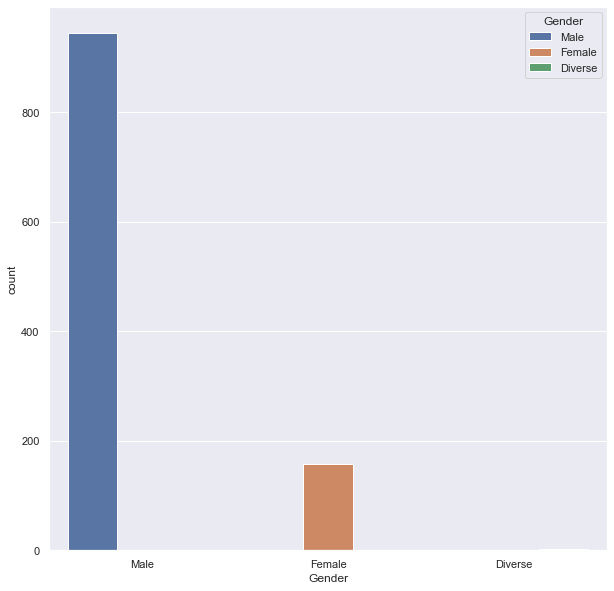

In [59]:
sns.set(rc={"figure.figsize":(10, 10)})
sns.countplot(x ='Gender', data=df, hue ='Gender')

We can observe that 85.5% of working force in an IT company are males and 14.2% of working force are females & remaning 0.18% are of diverse gender

We can conclude that IT companies is germany are male dominated

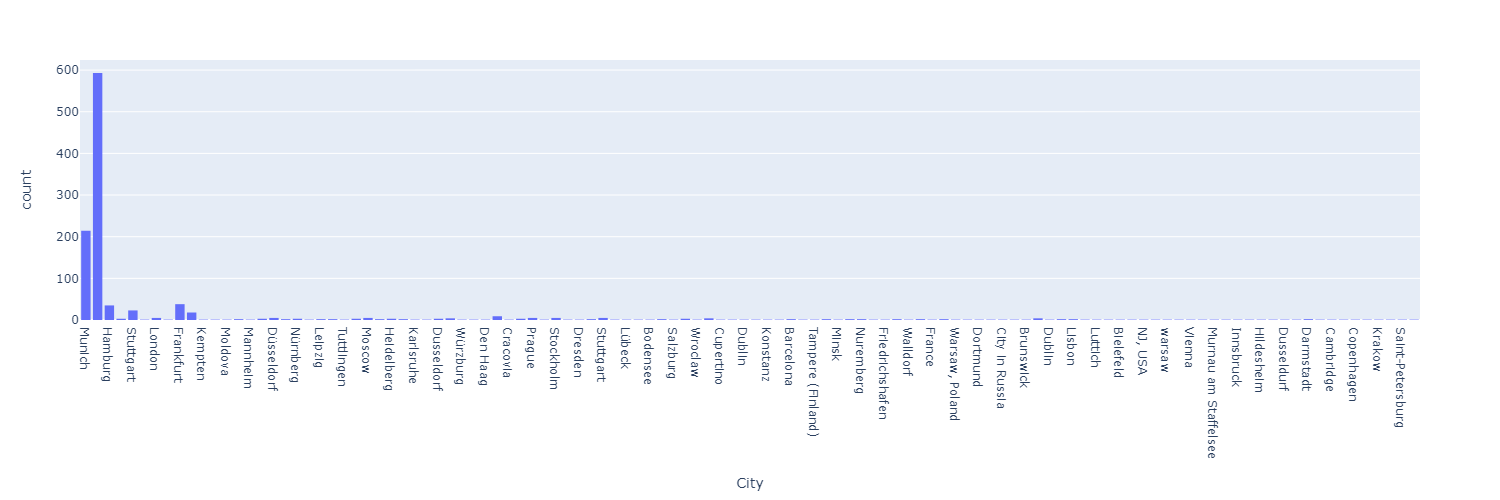

In [60]:
fig = px.histogram(x = 'City', data_frame = df,width = 1500 )
fig
fig.show("png")

From the graph we can find the top 5 cities of germany where most of the IT companies are situated
1. Berlin
2. Munich
3. Frankfurt
4. Hamburg
5. Stuttgart

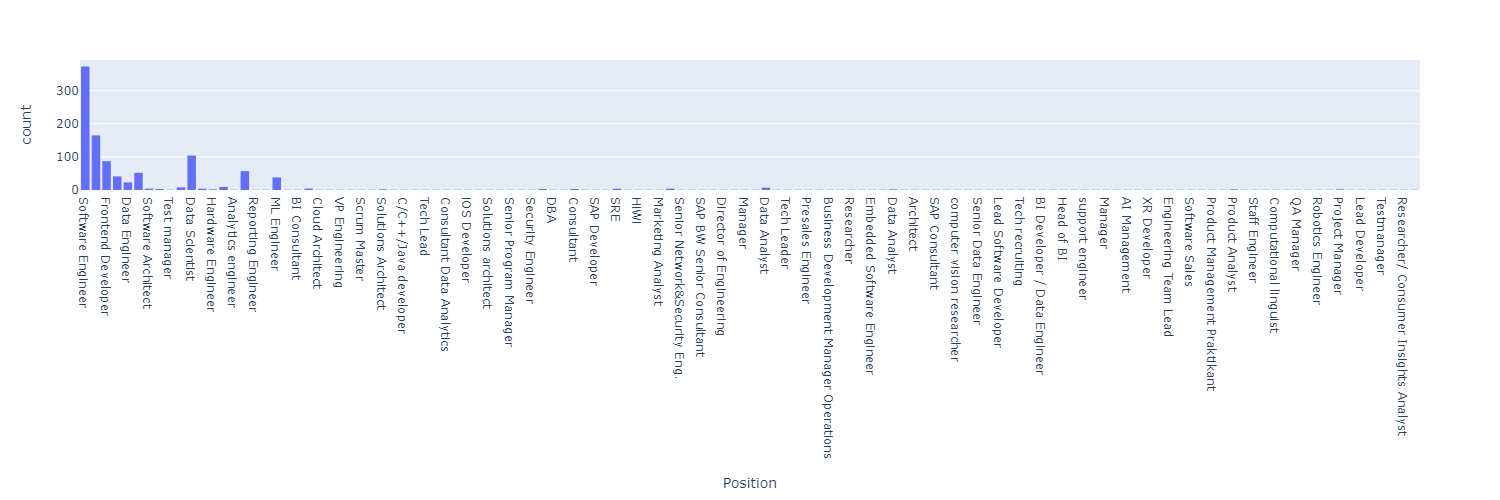

In [63]:
fig = px.histogram(x = 'Position', data_frame = df ,  opacity=1, width = 1500)
fig.show("png")


Top 9 job positions to work in germany are:
1. Software Engineer
2. Backend Developer
3. Data Scientist
4. Frontend Developer
5. QA Engineer
6. Mobile Developer
7. DevOps
8. ML Engineer
9. Data Engineer

If a person is a 'software engineer', 'backend developer' or a 'data scientist' then they have a lot of job oppurtunities in germany

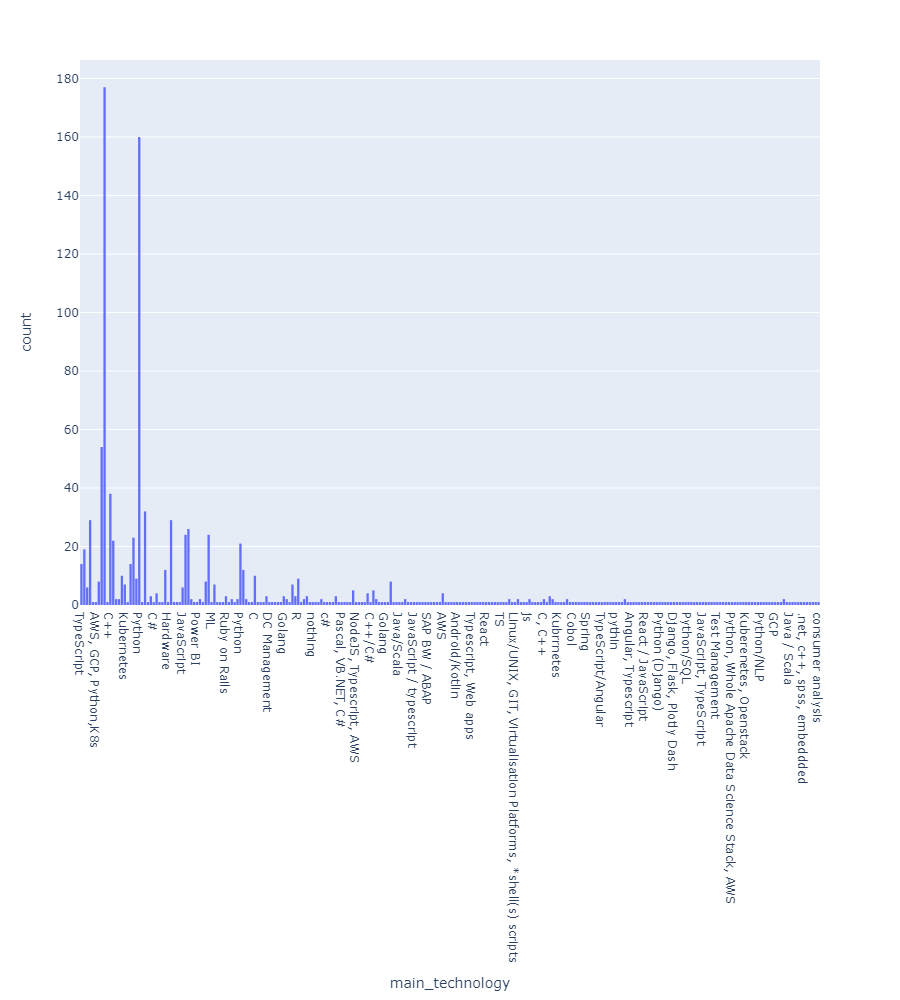

In [64]:
fig = px.histogram(x = 'main_technology', data_frame = df ,  opacity=1, width = 900, height=1000)
fig.show("png")

Top 5 programming language used in IT companies of Germany are:
1. Java
2. Python
3. PHP
4. C++
5. Java Script

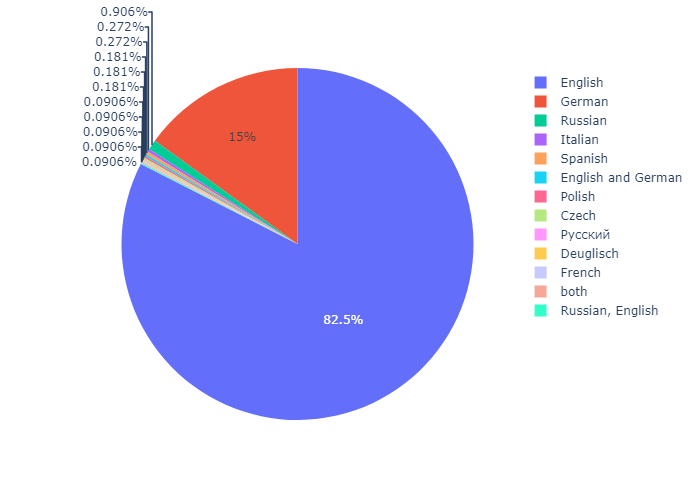

In [65]:
fig = px.pie(df, names='Main language at work')
fig.show("png")

82.5% of IT companies in Germany uses English as their main language

15% of IT companies in germany uses german as thier main language

So people who are looking forward to work in Germany in an IT company don't have to worry much about learning the german language

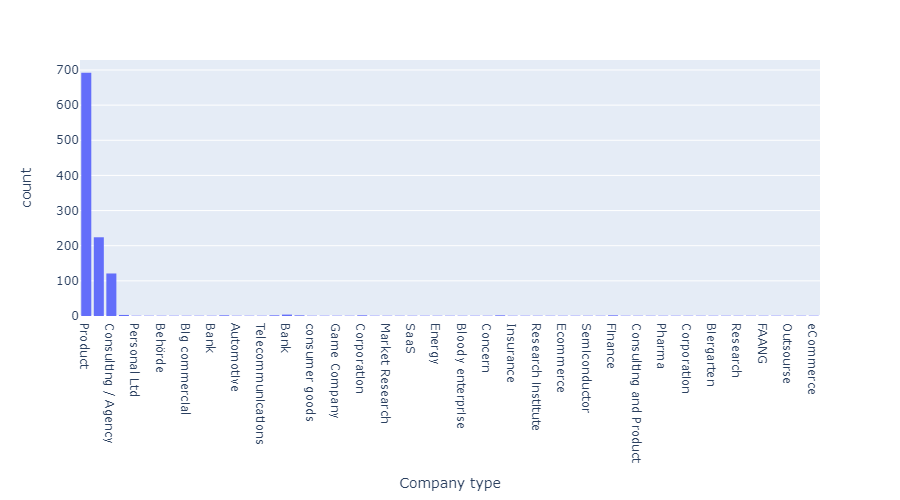

In [66]:
fig = px.histogram(x = 'Company type', data_frame = df ,  opacity=1, width = 900)
fig.show("png")

Top 3 type of company in Germany are:
1. Product Based
2. Startup
3. Consulting

The most of the IT job in Germany are in either 'product based' or in 'startup' company. 

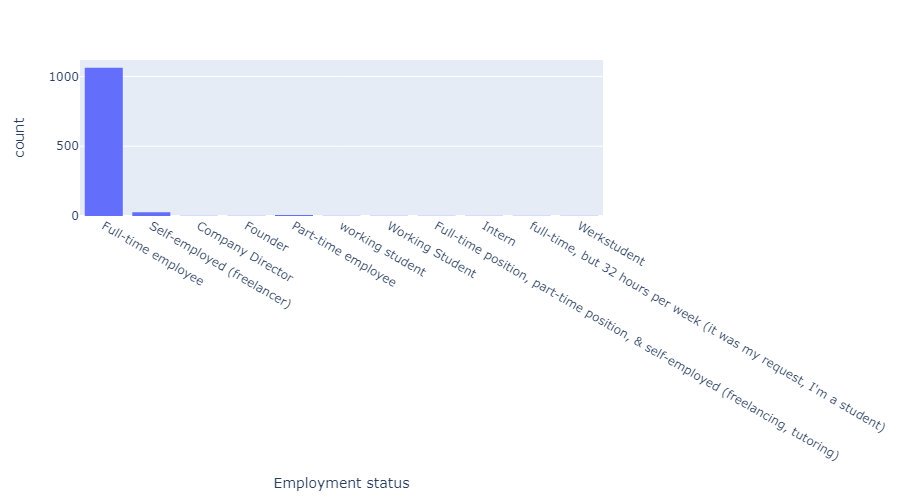

In [67]:
fig = px.histogram(x = 'Employment status', data_frame = df ,  opacity=1, width = 900)
fig.show("png")

1.Full-time employee : 96.1%

2.Self-employed (freelancer): 2.36%

It shows that "it's very hard to find an intern or part-time job in an IT company in germany"

In [68]:
df['yearly_bonus']

0         5000.0
1            0.0
2       120000.0
3            0.0
4            0.0
          ...   
1248     72000.0
1249      3000.0
1250         0.0
1251     40950.0
1252      6500.0
Name: yearly_bonus, Length: 1104, dtype: float64

In [69]:
df.head()

,Age,Gender,City,Position,experience,experience_in_Germany,Seniority level,main_technology,Other_technologies,yearly_salary,yearly_bonus,vacation,Employment status,Сontract duration,Main language at work,Company size,Company type
0,26.0,Male,Munich,Software Engineer,5.0,3.0,Senior,TypeScript,"Kotlin, Javascript / Typescript",80000.0,5000.0,30.0,Full-time employee,Unlimited contract,English,51-100,Product
1,26.0,Male,Berlin,Backend Developer,7.0,4.0,Senior,Ruby,No_tech,80000.0,0.0,28.0,Full-time employee,Unlimited contract,English,101-1000,Product
2,29.0,Male,Berlin,Software Engineer,12.0,6.0,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",120000.0,120000.0,30.0,Self-employed (freelancer),Temporary contract,English,101-1000,Product
3,28.0,Male,Berlin,Frontend Developer,4.0,1.0,Junior,Javascript,No_tech,54000.0,0.0,24.0,Full-time employee,Unlimited contract,English,51-100,Startup
4,37.0,Male,Berlin,Backend Developer,17.0,6.0,Senior,C# .NET,".NET, SQL, AWS, Docker",62000.0,0.0,29.0,Full-time employee,Unlimited contract,English,101-1000,Product


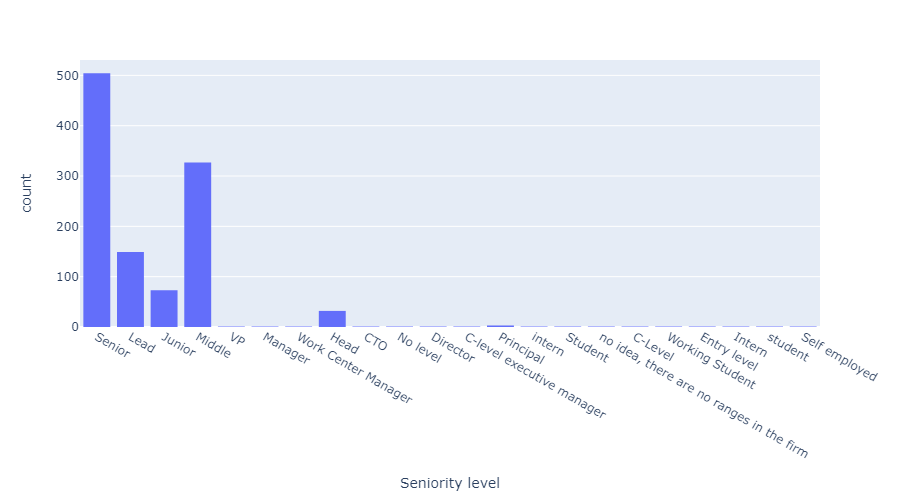

In [70]:
fig = px.histogram(data_frame = df, x = 'Seniority level', width=900)
fig.show("png")

The above data tells that the entry level jobs are very less in IT field in germany so, if you are planning to work in germany in IT field it is better to have some experience of atleast 2-5 years so that you can easily find the job.

In [71]:
df['experience'].max()

40.0

In [72]:
#df.drop('exp_group', axis = 1, inplace = True)

In [73]:
bins = [0,5,10,15,20,25,30,35,40]
df['exp_group'] = pd.cut(df['experience'], bins)

In [74]:
df.head()

,Age,Gender,City,Position,experience,experience_in_Germany,Seniority level,main_technology,Other_technologies,yearly_salary,yearly_bonus,vacation,Employment status,Сontract duration,Main language at work,Company size,Company type,exp_group
0,26.0,Male,Munich,Software Engineer,5.0,3.0,Senior,TypeScript,"Kotlin, Javascript / Typescript",80000.0,5000.0,30.0,Full-time employee,Unlimited contract,English,51-100,Product,"(0, 5]"
1,26.0,Male,Berlin,Backend Developer,7.0,4.0,Senior,Ruby,No_tech,80000.0,0.0,28.0,Full-time employee,Unlimited contract,English,101-1000,Product,"(5, 10]"
2,29.0,Male,Berlin,Software Engineer,12.0,6.0,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",120000.0,120000.0,30.0,Self-employed (freelancer),Temporary contract,English,101-1000,Product,"(10, 15]"
3,28.0,Male,Berlin,Frontend Developer,4.0,1.0,Junior,Javascript,No_tech,54000.0,0.0,24.0,Full-time employee,Unlimited contract,English,51-100,Startup,"(0, 5]"
4,37.0,Male,Berlin,Backend Developer,17.0,6.0,Senior,C# .NET,".NET, SQL, AWS, Docker",62000.0,0.0,29.0,Full-time employee,Unlimited contract,English,101-1000,Product,"(15, 20]"


In [75]:
df['exp_group'] = df['exp_group'].astype('str')

In [76]:
df['exp_group']

0         (0, 5]
1        (5, 10]
2       (10, 15]
3         (0, 5]
4       (15, 20]
          ...   
1248     (5, 10]
1249     (5, 10]
1250    (10, 15]
1251     (5, 10]
1252      (0, 5]
Name: exp_group, Length: 1104, dtype: object

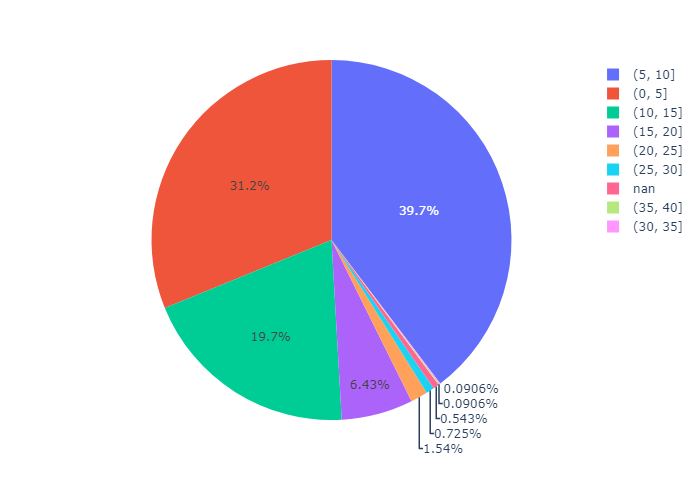

In [77]:
fig = px.pie(df, names='exp_group')
fig.show("png")

From above pie chart we can say that it is a person should have atleast 2-5 years of experience to get an IT job in Germany.

# Bivariate Analysis

In [78]:
df.head()

,Age,Gender,City,Position,experience,experience_in_Germany,Seniority level,main_technology,Other_technologies,yearly_salary,yearly_bonus,vacation,Employment status,Сontract duration,Main language at work,Company size,Company type,exp_group
0,26.0,Male,Munich,Software Engineer,5.0,3.0,Senior,TypeScript,"Kotlin, Javascript / Typescript",80000.0,5000.0,30.0,Full-time employee,Unlimited contract,English,51-100,Product,"(0, 5]"
1,26.0,Male,Berlin,Backend Developer,7.0,4.0,Senior,Ruby,No_tech,80000.0,0.0,28.0,Full-time employee,Unlimited contract,English,101-1000,Product,"(5, 10]"
2,29.0,Male,Berlin,Software Engineer,12.0,6.0,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",120000.0,120000.0,30.0,Self-employed (freelancer),Temporary contract,English,101-1000,Product,"(10, 15]"
3,28.0,Male,Berlin,Frontend Developer,4.0,1.0,Junior,Javascript,No_tech,54000.0,0.0,24.0,Full-time employee,Unlimited contract,English,51-100,Startup,"(0, 5]"
4,37.0,Male,Berlin,Backend Developer,17.0,6.0,Senior,C# .NET,".NET, SQL, AWS, Docker",62000.0,0.0,29.0,Full-time employee,Unlimited contract,English,101-1000,Product,"(15, 20]"


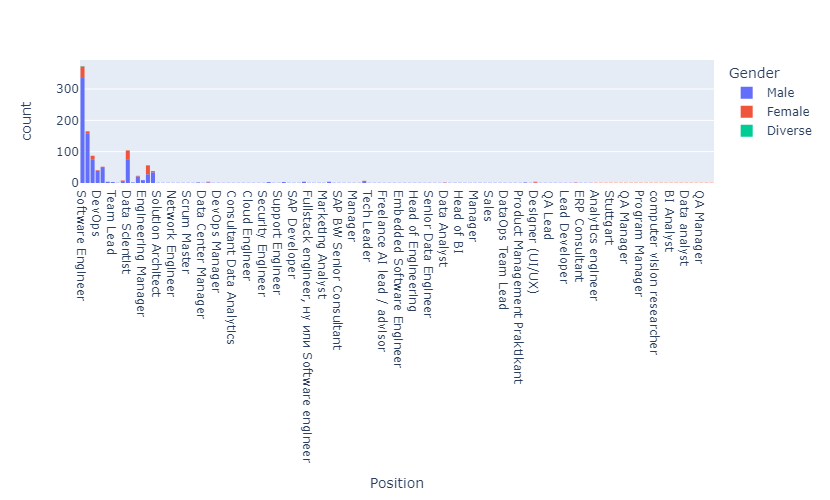

In [79]:
fig = px.histogram(data_frame = df, x = 'Position',color='Gender', width=830)
fig.show("png")

1. QA Engineer
    Male = 50%
    Female = 50%
2. Data Scientist
    Male = 73%
    Female = 26%
3. Frontend Developer
    Male = 85%
    Female = 15%
4. Software Developer
    Male = 90.8%
    Female = 9.13%
5. Mobile Developer
    Male = 92%
    Female = 8%
6. Backend Developer
    Male = 95.5%
    Female = 4.84%

In [80]:
df['yearly_salary'].value_counts()

60000.0     71
65000.0     71
75000.0     70
70000.0     69
80000.0     59
            ..
122000.0     1
63700.0      1
156000.0     1
34000.0      1
38350.0      1
Name: yearly_salary, Length: 195, dtype: int64

In [81]:
df['yearly_salary'] = df['yearly_salary'].astype('float')

In [82]:
def outliers(df1,ft):
    Q1 = df1[ft].quantile(0.25)
    Q3 = df1[ft].quantile(0.75)
    IQR = Q3-Q1
    
    lower_bound = Q1 - 1.5 *IQR
    upper_bound = Q3 + 1.5*IQR
    
    ls = df.index[(df1[ft]<lower_bound) | (df1[ft]>upper_bound)]
    return ls

In [83]:
index_list = []
for feature in ['yearly_salary']:
    index_list.extend(outliers(df, feature))

In [84]:
df['yearly_salary'].max()

500000000.0

In [85]:
df.drop(853,inplace=True)

In [86]:
df.describe()

,Age,experience,experience_in_Germany,yearly_salary,yearly_bonus
count,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000
mean,32.419764,8.715866,3.696736,71805.649257,13648.633228
std,5.556070,5.284762,3.550466,34032.051410,31098.045882
min,20.000000,0.000000,0.000000,10001.000000,0.000000
25%,29.000000,5.000000,1.000000,58900.000000,0.000000
50%,32.000000,8.000000,3.000000,70000.000000,0.000000
75%,35.000000,12.000000,5.000000,80000.000000,10000.000000
max,66.000000,40.000000,30.000000,850000.000000,450000.000000


In [87]:
df['yearly_salary']

0        80000.0
1        80000.0
2       120000.0
3        54000.0
4        62000.0
          ...   
1248     70000.0
1249     60000.0
1250    110000.0
1251     38350.0
1252     65000.0
Name: yearly_salary, Length: 1103, dtype: float64

In [88]:
df['Total_salary'] = df['yearly_salary'] + df['yearly_bonus']

In [89]:
index_list

[2,
 35,
 107,
 131,
 141,
 186,
 192,
 193,
 272,
 280,
 318,
 333,
 350,
 366,
 382,
 391,
 393,
 415,
 436,
 441,
 445,
 491,
 494,
 511,
 528,
 543,
 558,
 559,
 573,
 574,
 576,
 601,
 630,
 641,
 680,
 683,
 691,
 706,
 712,
 727,
 750,
 751,
 778,
 804,
 833,
 837,
 838,
 853,
 855,
 865,
 883,
 924,
 943,
 947,
 958,
 959,
 960,
 966,
 967,
 971,
 982,
 993,
 1008,
 1046,
 1051,
 1052,
 1085,
 1135,
 1142,
 1155,
 1209,
 1223,
 1234,
 1242]

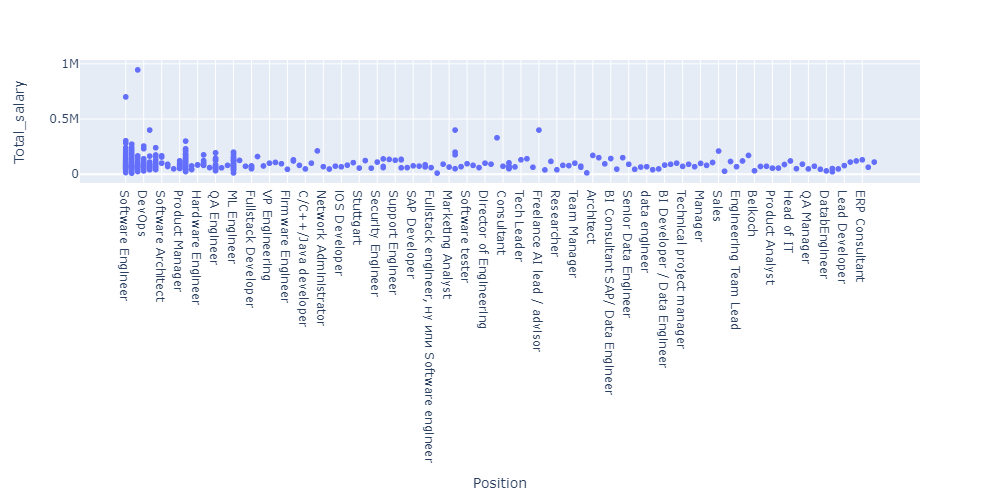

In [90]:
fig = px.scatter(data_frame = df, y = 'Total_salary', x = 'Position', width=1000)
fig.show("png")

Range of yearly salary for different position in euros:

Software Engineer : 15k to 250k

Backend Developer : 10k to 172k

Frontend Developer : 19k to 110k

Devops             : 30k to 140k

Data Scientist     :  20k to 300k

ML Engineer        : 36k to 180k

The range of salary of a data scientiest is really good as compared to other positions
 

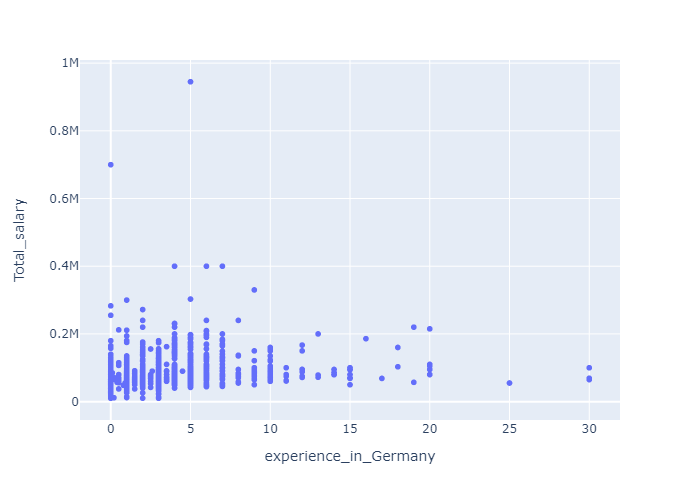

In [91]:
fig = px.scatter(data_frame = df, y = 'Total_salary', x = 'experience_in_Germany')
fig.show("png")

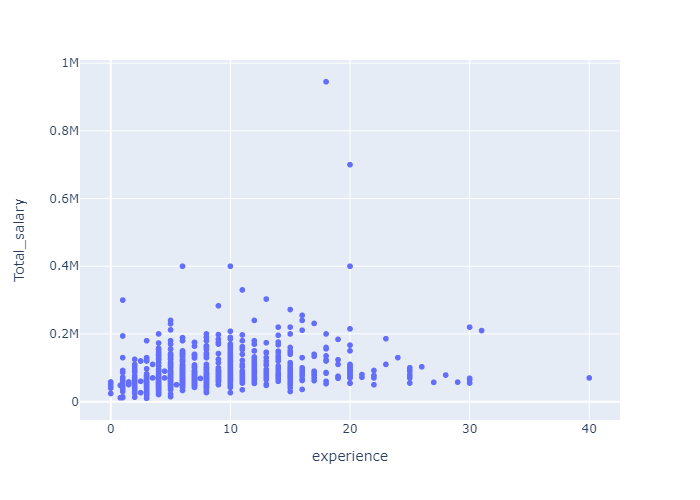

In [92]:
fig = px.scatter(data_frame = df, y = 'Total_salary', x = 'experience')
fig.show("png")

From above graph we can conclude that it is better to have atleast 2 to 3 years of minimum experience before coming to germany to get a good paying IT job

In [93]:
df.head()

,Age,Gender,City,Position,experience,experience_in_Germany,Seniority level,main_technology,Other_technologies,yearly_salary,yearly_bonus,vacation,Employment status,Сontract duration,Main language at work,Company size,Company type,exp_group,Total_salary
0,26.0,Male,Munich,Software Engineer,5.0,3.0,Senior,TypeScript,"Kotlin, Javascript / Typescript",80000.0,5000.0,30.0,Full-time employee,Unlimited contract,English,51-100,Product,"(0, 5]",85000.0
1,26.0,Male,Berlin,Backend Developer,7.0,4.0,Senior,Ruby,No_tech,80000.0,0.0,28.0,Full-time employee,Unlimited contract,English,101-1000,Product,"(5, 10]",80000.0
2,29.0,Male,Berlin,Software Engineer,12.0,6.0,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",120000.0,120000.0,30.0,Self-employed (freelancer),Temporary contract,English,101-1000,Product,"(10, 15]",240000.0
3,28.0,Male,Berlin,Frontend Developer,4.0,1.0,Junior,Javascript,No_tech,54000.0,0.0,24.0,Full-time employee,Unlimited contract,English,51-100,Startup,"(0, 5]",54000.0
4,37.0,Male,Berlin,Backend Developer,17.0,6.0,Senior,C# .NET,".NET, SQL, AWS, Docker",62000.0,0.0,29.0,Full-time employee,Unlimited contract,English,101-1000,Product,"(15, 20]",62000.0


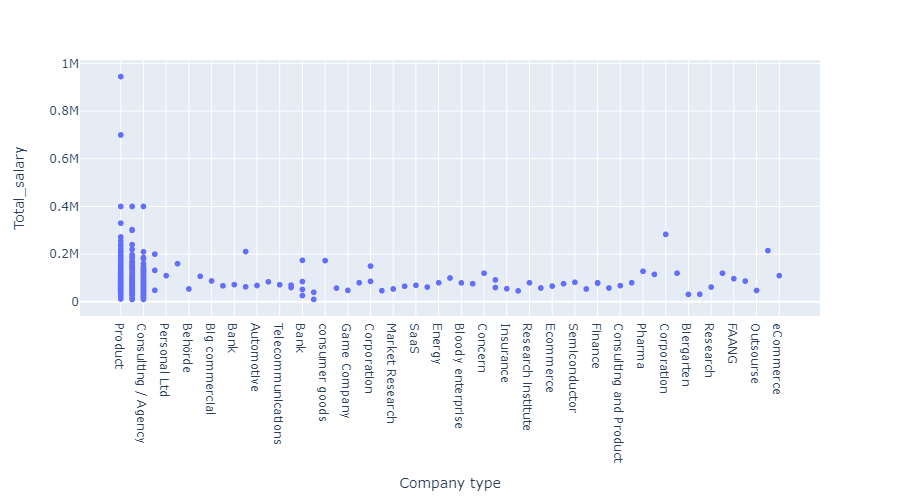

In [94]:
fig = px.scatter(data_frame = df, y = 'Total_salary', x = 'Company type', width=900)
fig.show("png")

The product based company and startups have a good pay range, so it is better to look for a job either in startup or product based company if you are solely looking for a good pay 

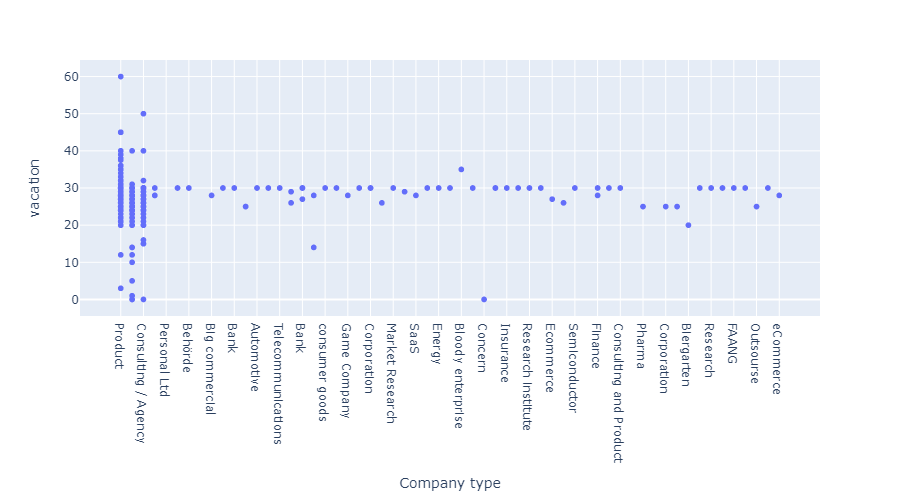

In [95]:
fig = px.scatter(data_frame = df, x = 'Company type', y = 'vacation', width=900)
fig.show("png")

In Germany companies have 20 to 40 days of yearly vacations.

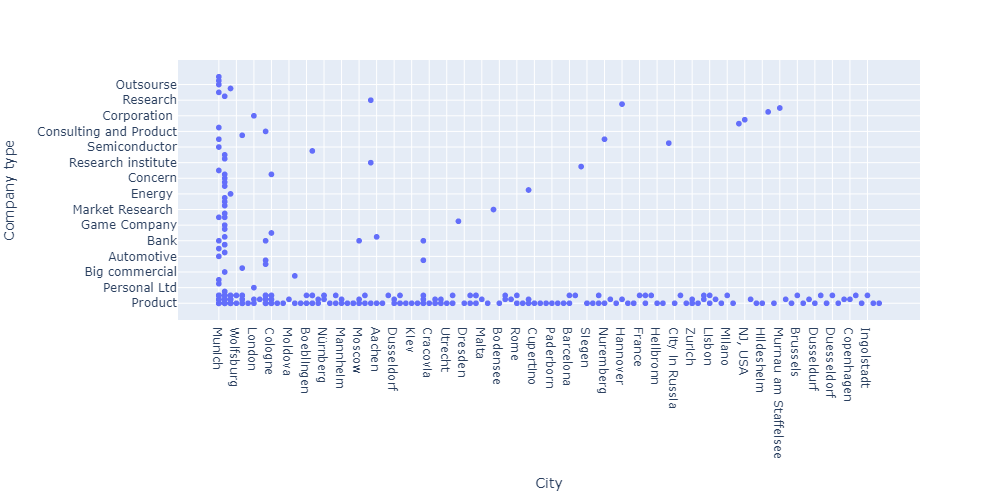

In [96]:
fig = px.scatter(data_frame = df, x = 'City',y = 'Company type', width=1000)
fig.show("png")

Most of the  companies are situated in Berlin and Munich, so if a person is looking for a job in Germany then they are most likely to get a job in city like berlin , munich or hamburg

# Conclusion

1. Most of the IT companies have more male work force as compared to female work force


2. IT companies are located in citites like 'Berlin', 'Munich', 'Frankfurt', 'Hamburg'


3. In demand programming languages in German IT companies are 'Java', 'Python', 'PHP', 'C++', 'Java Script' so it is better to have these programming language in pocket before coming to Germany.


4. Most of the jobs are in product based and in startup companies so it is better to search for product based companies in Germany.


5. Almost every jobs are full-time there are very less freelancing jobs.


6. Entry level jobs are very less so it is better to gain some experience first in your country then come to Germany.


7. If you are looking for good paying job then look for product based company


8. Average of 30 days of vacation is provided to employees.

In [97]:
#df.to_csv('German_salary1')